In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
# Display the first few rows of the dataset
df = pd.read_csv('./jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [5]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [6]:
print("UNIQUE RECORDS IN DATA TABLE")
for columns_name in df.columns:
    print('--'*38)
    print(columns_name.upper())
    print(df[columns_name].unique())

UNIQUE RECORDS IN DATA TABLE
----------------------------------------------------------------------------
WORK_YEAR
[2023 2022 2020 2021]
----------------------------------------------------------------------------
JOB_TITLE
['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' 'Data Integration Engineer'
 'Busi

In [7]:
Total_columns = df.columns


To_Encoder = ['experience_level', 'work_year', 'company_size', 'salary_currency']
Enconder_columns = LabelEncoder()

for columns in To_Encoder:
    if columns in Total_columns:
        df[columns] = Enconder_columns.fit_transform(df[columns])

In [8]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

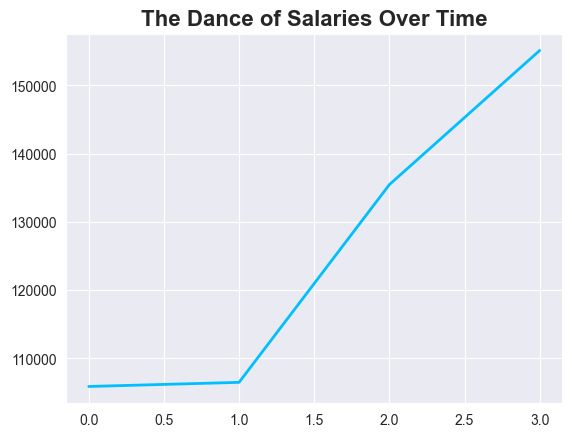

In [9]:
salary_trends = df.groupby("work_year")["salary_in_usd"].mean()
plt.plot(salary_trends.index, salary_trends.values, color="deepskyblue", linewidth=2)
plt.title("The Dance of Salaries Over Time", fontsize=16, fontweight="bold")
plt.show()

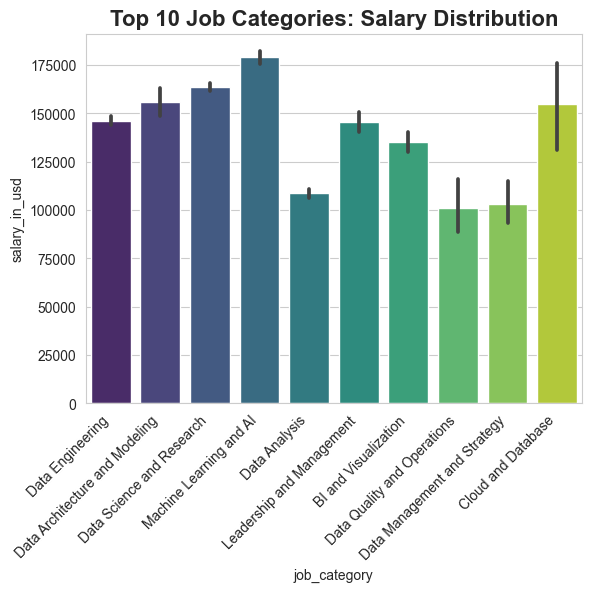

In [10]:
# Calculate the top 10 job categories based on average salary
top_job_categories = df.groupby('job_category')['salary_in_usd'].mean().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only the top 10 job categories
df_top10 = df[df['job_category'].isin(top_job_categories)]

# Plot the bar chart for the top 10 job categories
sns.set_style("whitegrid")
sns.barplot(x="job_category", y="salary_in_usd", data=df_top10, palette="viridis")
plt.title("Top 10 Job Categories: Salary Distribution", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

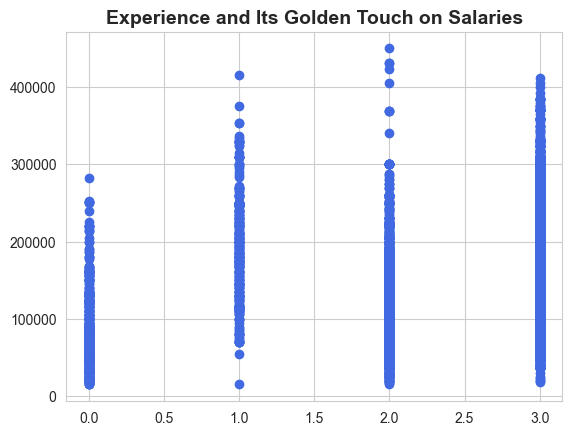

In [11]:
# **Exploring Relationships**
# Scatter plot for experience vs. salary

plt.scatter(df["experience_level"], df["salary_in_usd"], color="royalblue")
plt.title("Experience and Its Golden Touch on Salaries", fontsize=14, fontweight="bold")
plt.show()

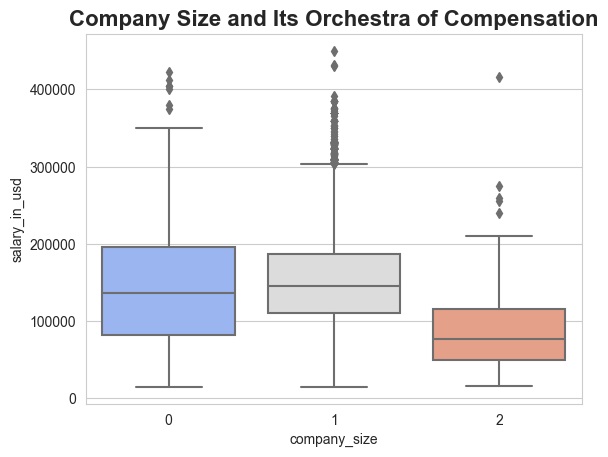

In [12]:
# Box plot for company size and salary
sns.boxplot(x="company_size", y="salary_in_usd", data=df, palette="coolwarm")
plt.title("Company Size and Its Orchestra of Compensation", fontsize=16, fontweight="bold")
plt.show()

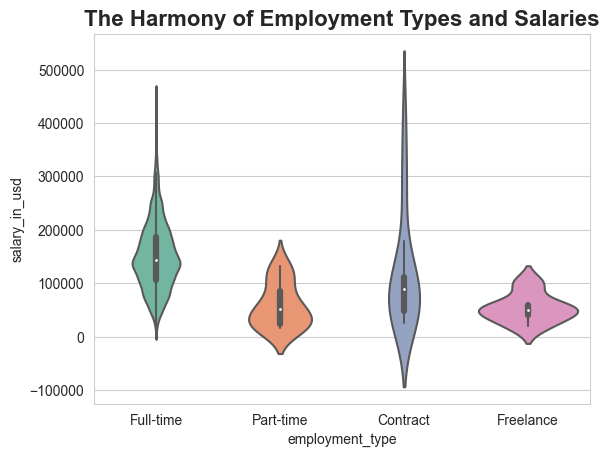

In [13]:
# Violin plot for employment type and salary
sns.violinplot(x="employment_type", y="salary_in_usd", data=df, palette="Set2")
plt.title("The Harmony of Employment Types and Salaries", fontsize=16, fontweight="bold")
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   int32 
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   int32 
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   int32 
dtypes: int32(3), int64(3), object(6)
memory usage: 767.5+ KB


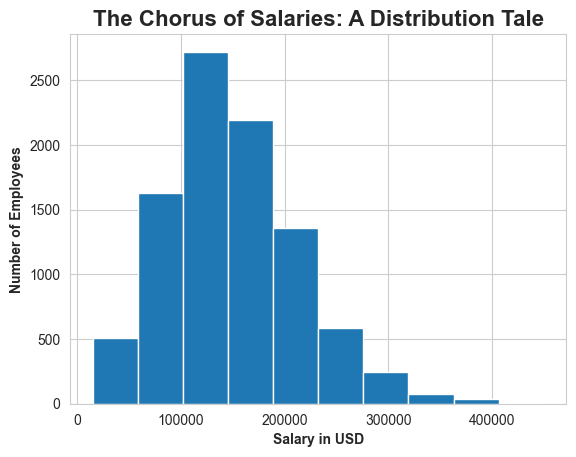

In [15]:
# Visualize the distribution of salary, the star of our show
import matplotlib.pyplot as plt

plt.hist(df["salary_in_usd"])
plt.xlabel("Salary in USD", fontweight="bold")
plt.ylabel("Number of Employees", fontweight="bold")
plt.title("The Chorus of Salaries: A Distribution Tale", fontsize=16, fontweight="bold")
plt.show()